# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
Dataset bersumber dari Kaggle dengan judul UNSW_NB15
by the IXIA PerfectStorm tool. Australian Centre for Cyber Security (ACCS). [https://www.kaggle.com/datasets/mrwellsdavid/unsw-nb15?select=UNSW-NB15_LIST_EVENTS.csv]

Dataset UNSW-NB15 merupakan dataset cybersecurity yang digunakan untuk membangun sistem Intrusion Detection System (IDS). Dataset ini dikembangkan oleh Australian Centre for Cyber Security (ACCS) dan berisi data lalu lintas jaringan yang mencakup aktivitas normal serta berbagai jenis serangan (attack).

Setiap baris data merepresentasikan satu aliran koneksi jaringan (network flow) yang diekstraksi dari traffic nyata menggunakan kombinasi tools seperti Argus dan Bro-IDS. Dataset ini terdiri dari fitur numerik dan kategorikal yang menggambarkan karakteristik koneksi jaringan, pola paket, serta perilaku komunikasi antar host.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

import warnings

warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../UNSW_NB15_raw/UNSW_NB15_training-set.csv")

from sklearn.model_selection import train_test_split

# hanya ambil 10.000 sampel untuk mempercepat eksperimen
df, _ = train_test_split(
    df, train_size=10000, stratify=df["label"], random_state=42
)


df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
7095,7096,1.645795,tcp,http,FIN,10,8,920,354,10.329355,...,1,1,0,0,1,1,2,0,Reconnaissance,1
12574,12575,2.023961,tcp,smtp,FIN,64,26,64216,2024,43.973178,...,1,1,0,0,0,10,1,0,Exploits,1
80756,80757,0.000009,tcp,-,REQ,2,0,90,0,111111.107200,...,1,3,0,0,0,1,3,0,Normal,0
18079,18080,0.000008,udp,dns,INT,2,0,114,0,125000.000300,...,12,25,0,0,0,13,24,0,Generic,1
44511,44512,1.229500,tcp,-,FIN,10,8,564,354,13.826758,...,1,2,0,0,0,2,5,0,Reconnaissance,1


In [3]:
df["label"].value_counts()

label
1    5506
0    4494
Name: count, dtype: int64

In [4]:
df.shape

(10000, 45)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7095 to 74620
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   dur                10000 non-null  float64
 2   proto              10000 non-null  object 
 3   service            10000 non-null  object 
 4   state              10000 non-null  object 
 5   spkts              10000 non-null  int64  
 6   dpkts              10000 non-null  int64  
 7   sbytes             10000 non-null  int64  
 8   dbytes             10000 non-null  int64  
 9   rate               10000 non-null  float64
 10  sttl               10000 non-null  int64  
 11  dttl               10000 non-null  int64  
 12  sload              10000 non-null  float64
 13  dload              10000 non-null  float64
 14  sloss              10000 non-null  int64  
 15  dloss              10000 non-null  int64  
 16  sinpkt             10000

In [6]:
selected_features = [
    "dur",
    "proto",
    "service",
    "state",
    "spkts",
    "dpkts",
    "sbytes",
    "dbytes",
    "rate",
    "sttl",
    "dttl",
    "sload",
    "dload",
    "ct_srv_src",
    "ct_state_ttl",
    "label",
]

df = df[selected_features]

df.sample(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,ct_srv_src,ct_state_ttl,label
34537,0.201122,udp,-,CON,4,4,528,304,34.804745,31,29,1.575163e+04,9069.122070,13,0,0
37904,0.223458,tcp,ftp-data,FIN,14,6,8928,320,85.027161,31,29,2.968253e+05,9558.842773,4,0,0
25330,1.006916,tcp,http,FIN,14,18,1684,10168,30.787075,31,29,1.242606e+04,76304.273440,5,0,0
34605,0.014578,tcp,-,FIN,16,18,1540,1644,2263.685050,31,29,7.924269e+05,852243.125000,10,0,0
65914,7.996897,tcp,-,REQ,8,0,360,0,0.875339,254,0,3.151222e+02,0.000000,36,6,0
77824,0.418031,tcp,-,FIN,10,8,738,354,40.666840,254,252,1.272633e+04,5932.574219,11,1,0
14814,0.000008,udp,dns,INT,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000,18,2,1
15797,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,38,2,1
12205,0.000007,udp,dns,INT,2,0,114,0,142857.140900,254,0,6.514286e+07,0.000000,10,2,1
50970,0.000004,udp,dns,INT,2,0,114,0,250000.000600,254,0,1.140000e+08,0.000000,7,2,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

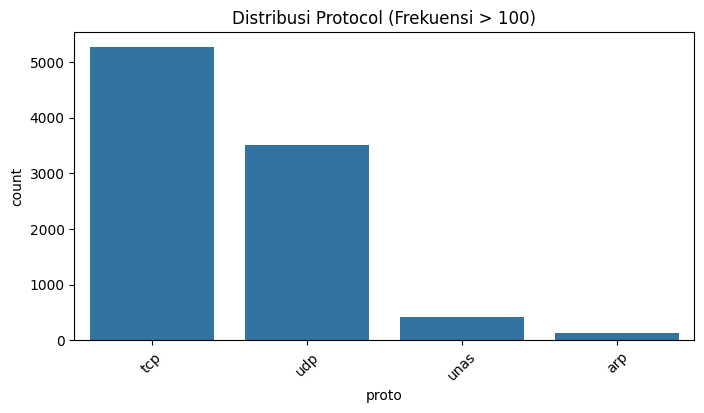

In [7]:
proto_counts = df["proto"].value_counts()
filtered_proto = proto_counts[proto_counts > 100].index

plt.figure(figsize=(8, 4))
sns.countplot(
    x="proto",
    data=df[df["proto"].isin(filtered_proto)],
    order=filtered_proto
)
plt.title("Distribusi Protocol (Frekuensi > 100)")
plt.xticks(rotation=45)
plt.show()


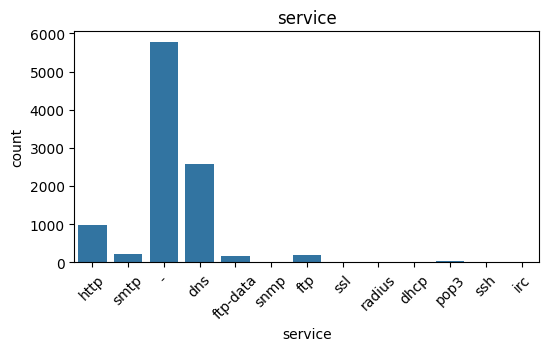

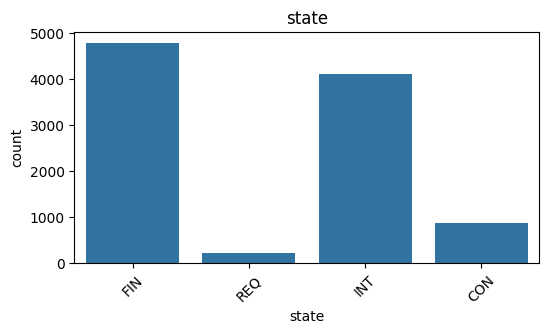

In [8]:
for col in df[["service", "state"]]:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

In [9]:
categorical_cols = ["proto", "service", "state"]

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

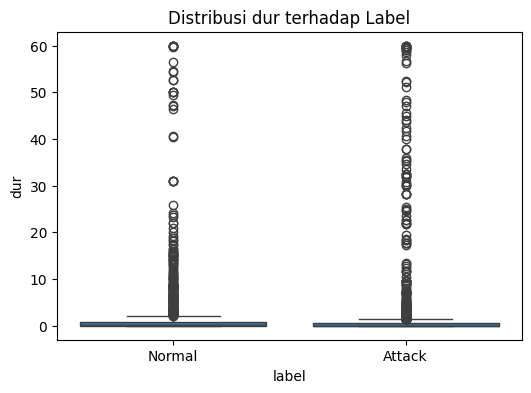

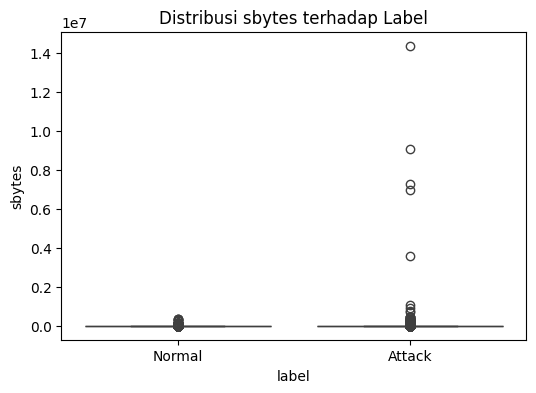

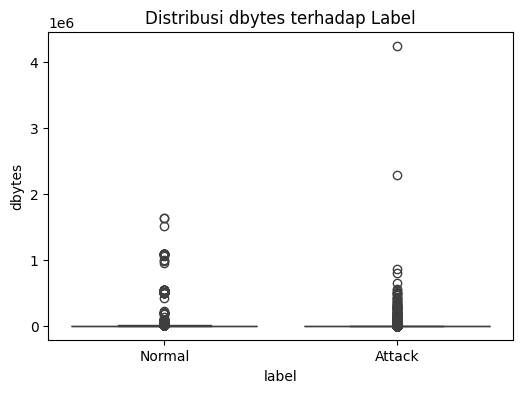

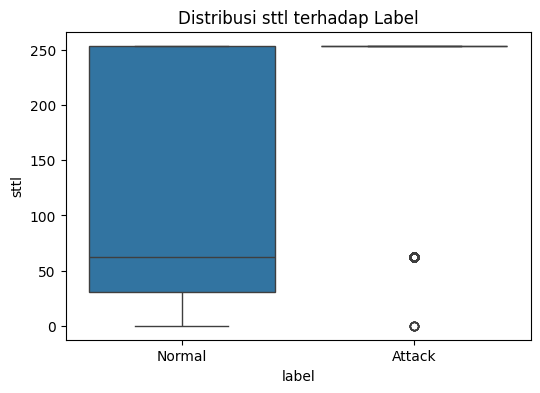

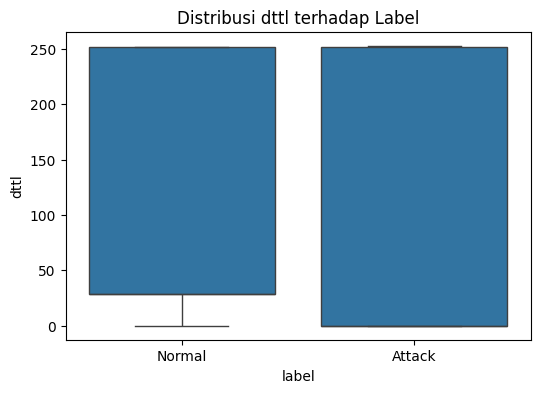

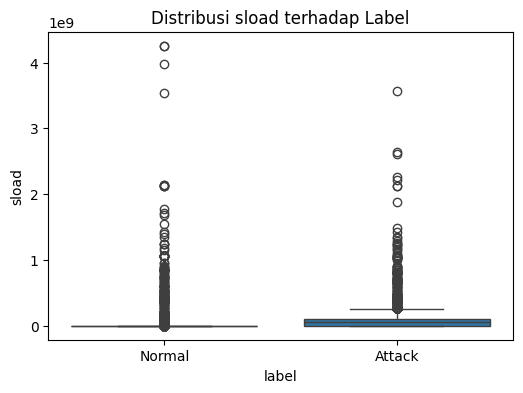

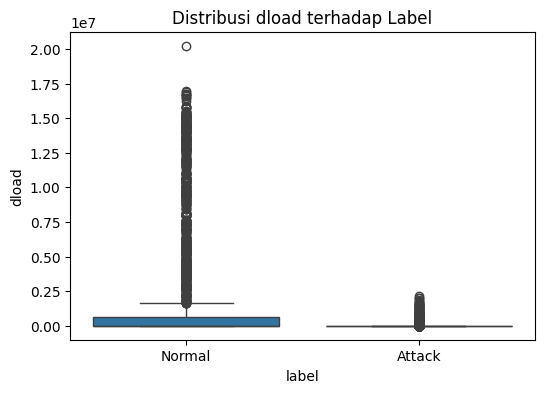

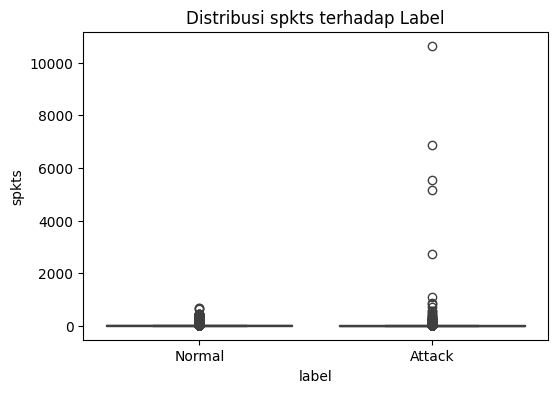

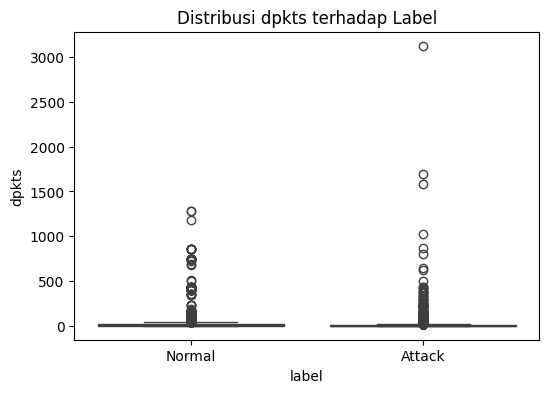

In [10]:
num_features = [
    "dur", "sbytes", "dbytes",
    "sttl", "dttl",
    "sload", "dload",
    "spkts", "dpkts"
]

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="label", y=col, data=df)
    plt.title(f"Distribusi {col} terhadap Label")
    plt.xticks([0, 1], ["Normal", "Attack"])
    plt.show()

In [11]:
numerical_cols = numerical_cols.drop("label")
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

Outlier dipertahankan karena dalam konteks cybersecurity, nilai ekstrem sering merepresentasikan serangan.

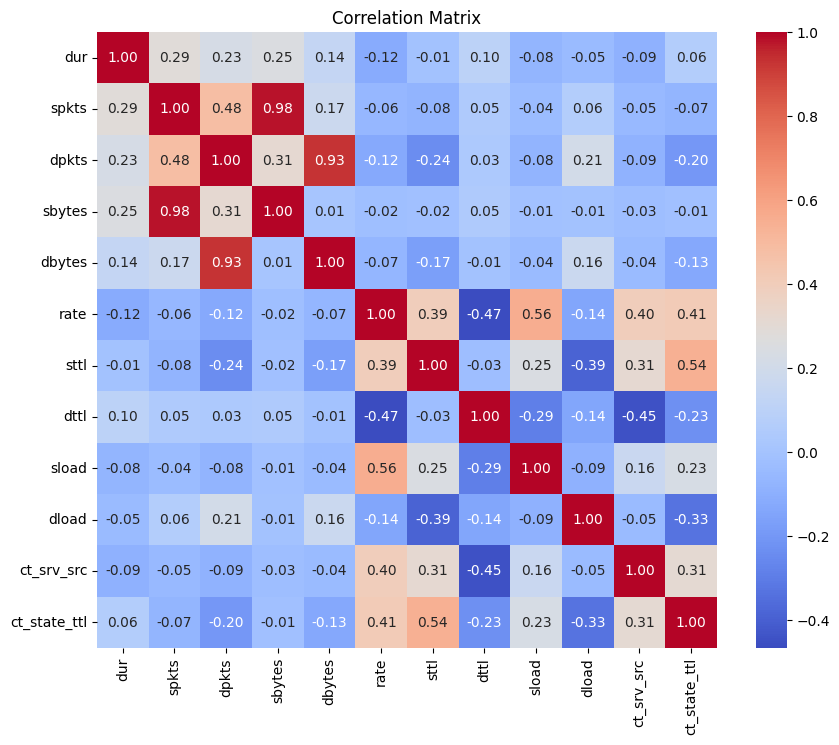

In [12]:
# Matriks
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [13]:
df.isnull().sum()

dur             0
proto           0
service         0
state           0
spkts           0
dpkts           0
sbytes          0
dbytes          0
rate            0
sttl            0
dttl            0
sload           0
dload           0
ct_srv_src      0
ct_state_ttl    0
label           0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(2896)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
X = df.drop(columns=["label"])
y = df["label"]

In [18]:
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

X_cat_encoded = encoder.fit_transform(X[categorical_cols])

encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)

X_cat_encoded = pd.DataFrame(X_cat_encoded, columns=encoded_cat_cols, index=X.index)

In [19]:
scaler = RobustScaler()
X_num_scaled = scaler.fit_transform(X[numerical_cols])

X_num_scaled = pd.DataFrame(X_num_scaled, columns=numerical_cols, index=X.index)

In [20]:
X_processed = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

X_processed.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ
7095,1.274703,0.000000,0.000000,0.044041,0.000000,-0.013165,0.000000,0.000000,-0.028002,-0.043947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12574,1.663553,3.857143,1.285714,41.038860,1.071887,-0.004770,-0.860987,0.000000,0.172794,0.038072,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
80756,-0.417579,-0.571429,-0.571429,-0.493523,-0.227214,27.710676,0.000000,-1.130045,32.640537,-0.063917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18079,-0.417580,-0.571429,-0.571429,-0.477979,-0.227214,31.176480,0.000000,-1.130045,46.526063,-0.063917,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44511,0.846647,0.000000,0.000000,-0.186528,0.000000,-0.012292,0.000000,0.000000,-0.028590,-0.037186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
processed_df = X_processed.copy()
processed_df["label"] = y

processed_df.to_csv("UNSW_NB15_preprocessing/UNSW_NB15_processed_data.csv", index=False)